In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:

from utils.plot_config import set_plot_style, format_plot

set_plot_style()

In [3]:

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")


In [6]:
train_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [5]:
train_data.shape

(33126, 8)

In [5]:
unique_counts = train_data.nunique()
print(unique_counts)

image_name                       33126
patient_id                        2056
sex                                  2
age_approx                          18
anatom_site_general_challenge        6
diagnosis                            9
benign_malignant                     2
target                               2
dtype: int64


In [6]:
train_data.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [16]:
target_dist = train_data['target'].value_counts()

In [33]:
print(target_dist)

0    32542
1      584
Name: target, dtype: int64


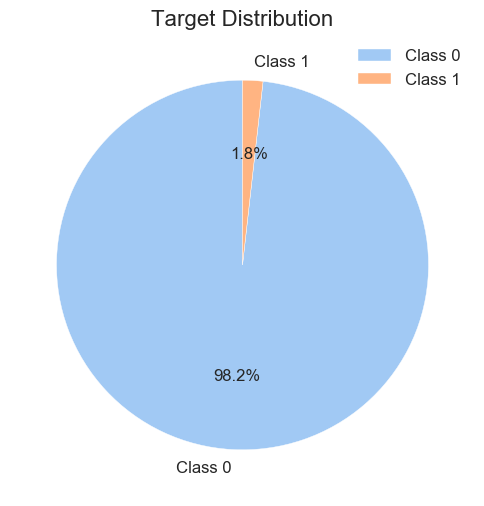

In [43]:
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')[0:2]
target_dist.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=colors, labels=['Class 0', 'Class 1'])
plt.title('Target Distribution')
plt.ylabel('')
plt.legend(['Class 0', 'Class 1'], loc='upper right')
plt.show()

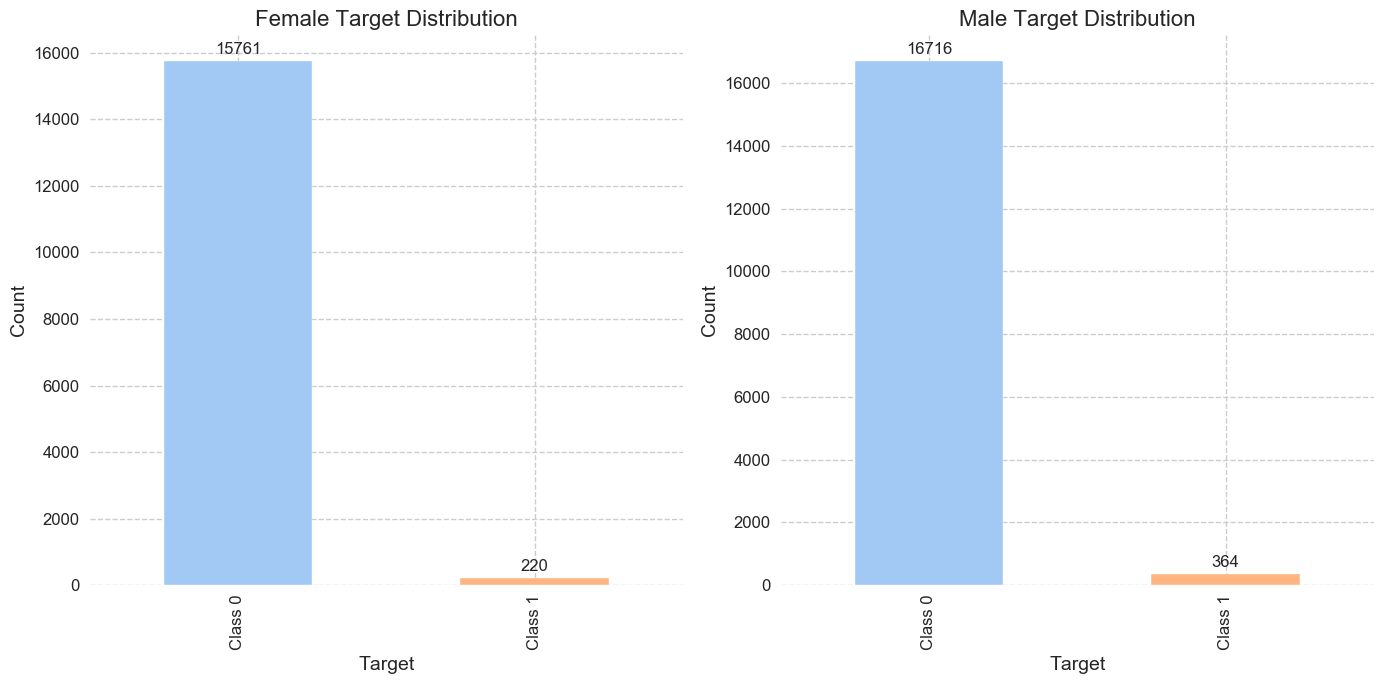

In [44]:
# Group by 'sex' and 'target' and count the occurrences
gender_target_counts = train_data.groupby(['sex', 'target']).size().unstack()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart for female
bars_female = gender_target_counts.loc['female'].plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Female Target Distribution')
ax1.set_xlabel('Target')
ax1.set_ylabel('Count')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 0', 'Class 1'])

# Annotate bars with values
for bar in bars_female.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=12, xytext=(0, 8),
                 textcoords='offset points')

# Bar chart for male
bars_male = gender_target_counts.loc['male'].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Male Target Distribution')
ax2.set_xlabel('Target')
ax2.set_ylabel('Count')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Class 0', 'Class 1'])

# Annotate bars with values
for bar in bars_male.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=12, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


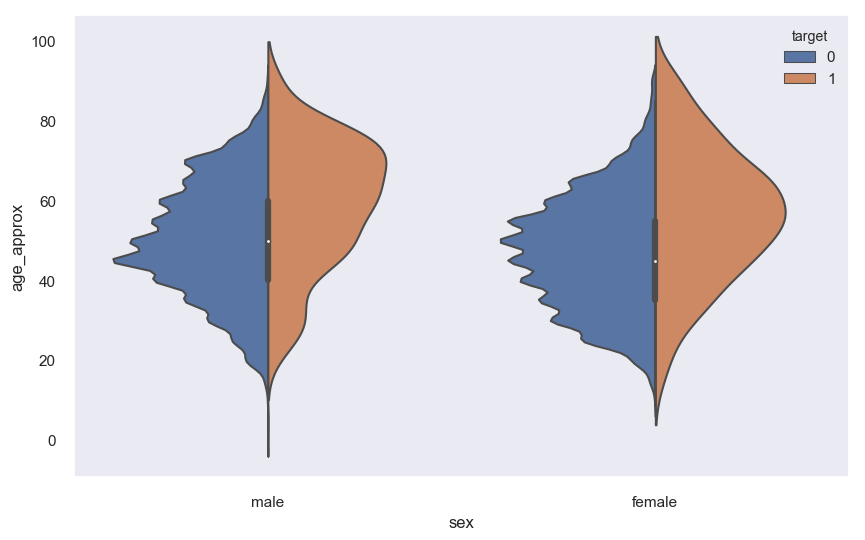

In [45]:
sns.set_theme(style="dark")

sns.violinplot(data = train_data, x='sex', y='age_approx', hue='target',
               split=True, innner= 'quart', fill=False)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

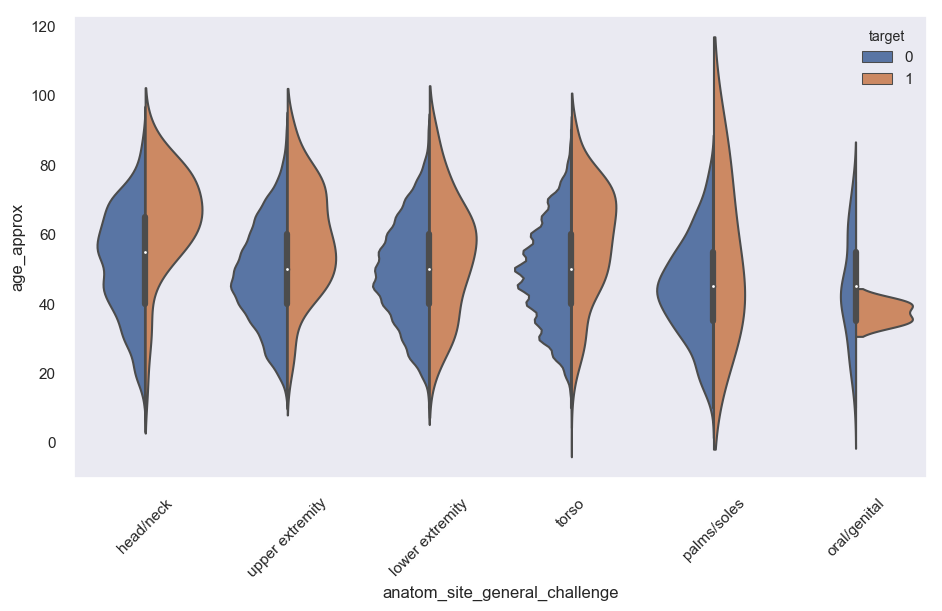

In [48]:
f, ax = plt.subplots(figsize=(11,6))

sns.violinplot(data = train_data, x='anatom_site_general_challenge', y='age_approx', hue='target',
               split=True, innner= 'quart', fill=False)

plt.xticks(rotation=45)



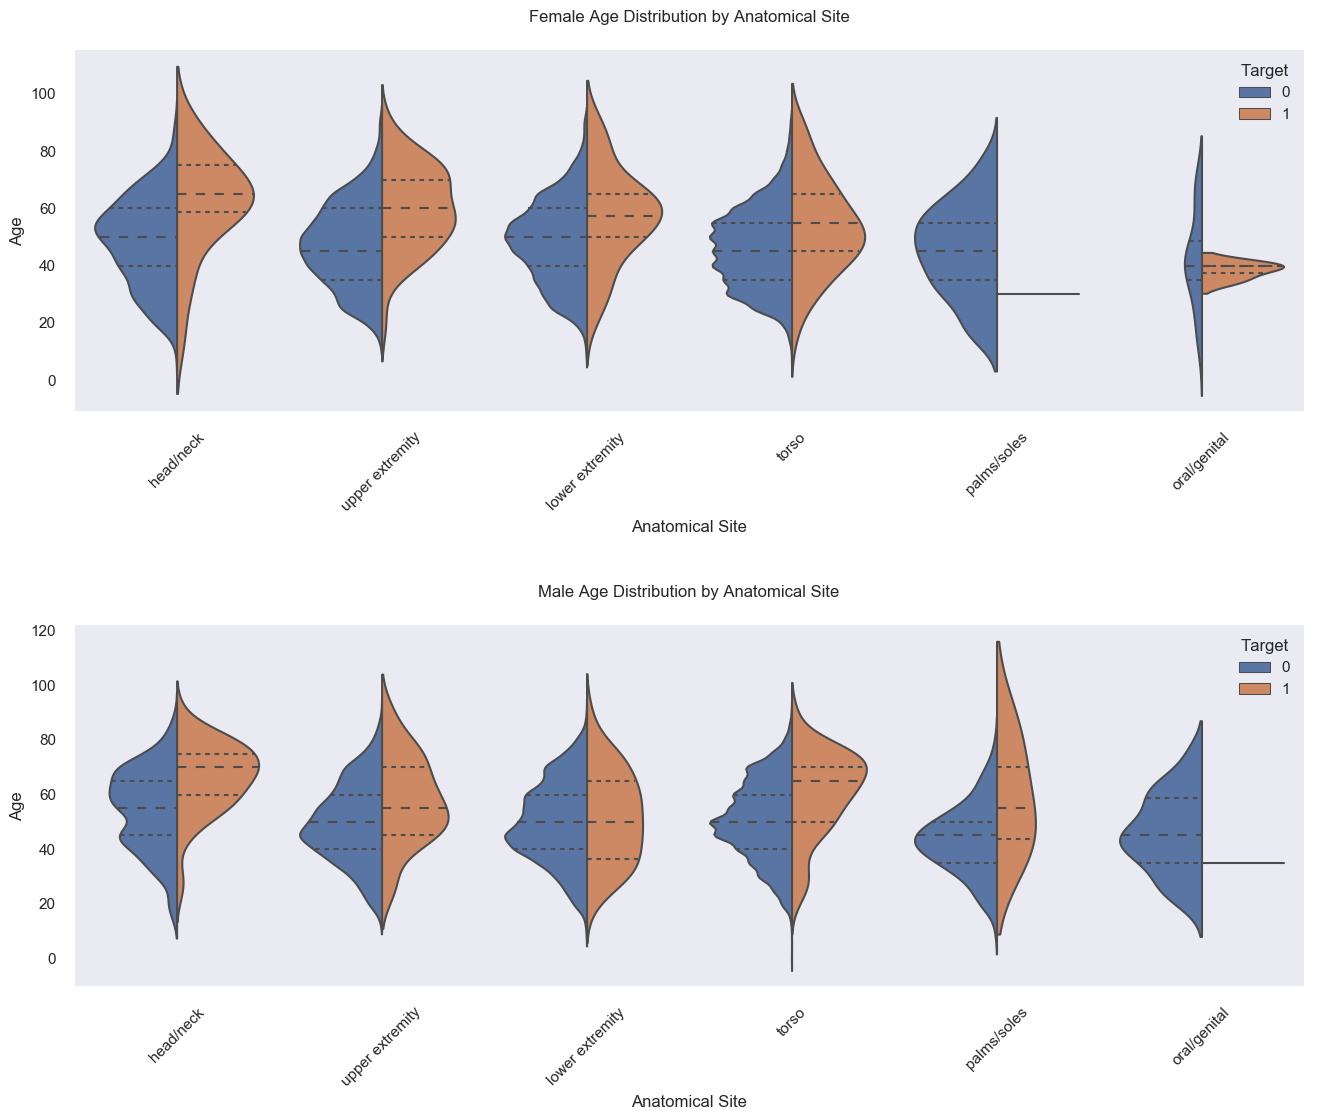

In [60]:
# Filter data for females and males
female_data = train_data[train_data['sex'] == 'female']
male_data = train_data[train_data['sex'] == 'male']

# Create a figure with two rows and one column of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Violin plot for females
sns.violinplot(data=female_data, x='anatom_site_general_challenge', y='age_approx', hue='target',
               split=True, inner='quart', fill=False, ax=ax1,
               order=['head/neck', 'upper extremity', 'lower extremity', 'torso','palms/soles', 'oral/genital'])
ax1.set_title('Female Age Distribution by Anatomical Site')
ax1.set_xlabel('Anatomical Site')
ax1.set_ylabel('Age')
ax1.legend(title='Target', loc='upper right')
ax1.tick_params(axis='x', rotation=45)
format_plot(ax1,
            title='Female Age Distribution by Anatomical Site',
            xlabel='Anatomical Site',
            ylabel='Age')

# Violin plot for males
sns.violinplot(data=male_data, x='anatom_site_general_challenge', y='age_approx', hue='target',
               split=True, inner='quart', fill=False, ax=ax2,
               order=['head/neck', 'upper extremity', 'lower extremity', 'torso', 'palms/soles', 'oral/genital'])
ax2.set_title('Male Age Distribution by Anatomical Site')
ax2.set_xlabel('Anatomical Site')
ax2.set_ylabel('Age')
ax2.legend(title='Target', loc='upper right')
ax2.tick_params(axis='x', rotation=45)
format_plot(ax2,
            title='Male Age Distribution by Anatomical Site',
            xlabel='Anatomical Site',
            ylabel='Age')

plt.tight_layout(pad=3.0)
plt.show()



In [63]:
train_data['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [64]:
# Check if 'benign_malignant' column is the same as 'target' column
comparison = train_data['benign_malignant'].map({'benign': 0, 'malignant': 1}) == train_data['target']
print(comparison.all())

True
